# IMPORTING LIBRARIES

# 23/02/2022

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Let us Import and Explore the Dataset

In [2]:
data = pd.read_csv("Titanic dataset EDA.csv")

In [3]:
type(data)

pandas.core.frame.DataFrame

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
data.shape
print("No of records:", data.shape[0])
print("No of Attributes:", data.shape[1])

No of records: 891
No of Attributes: 12


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
data.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [10]:
data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<AxesSubplot:>

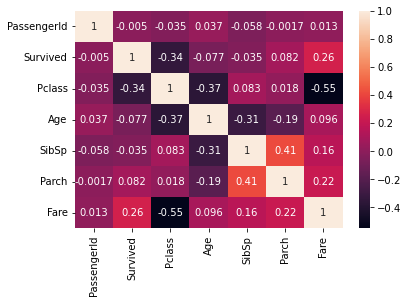

In [11]:
sns.heatmap(data.corr(), annot=True)     # annot means annotations

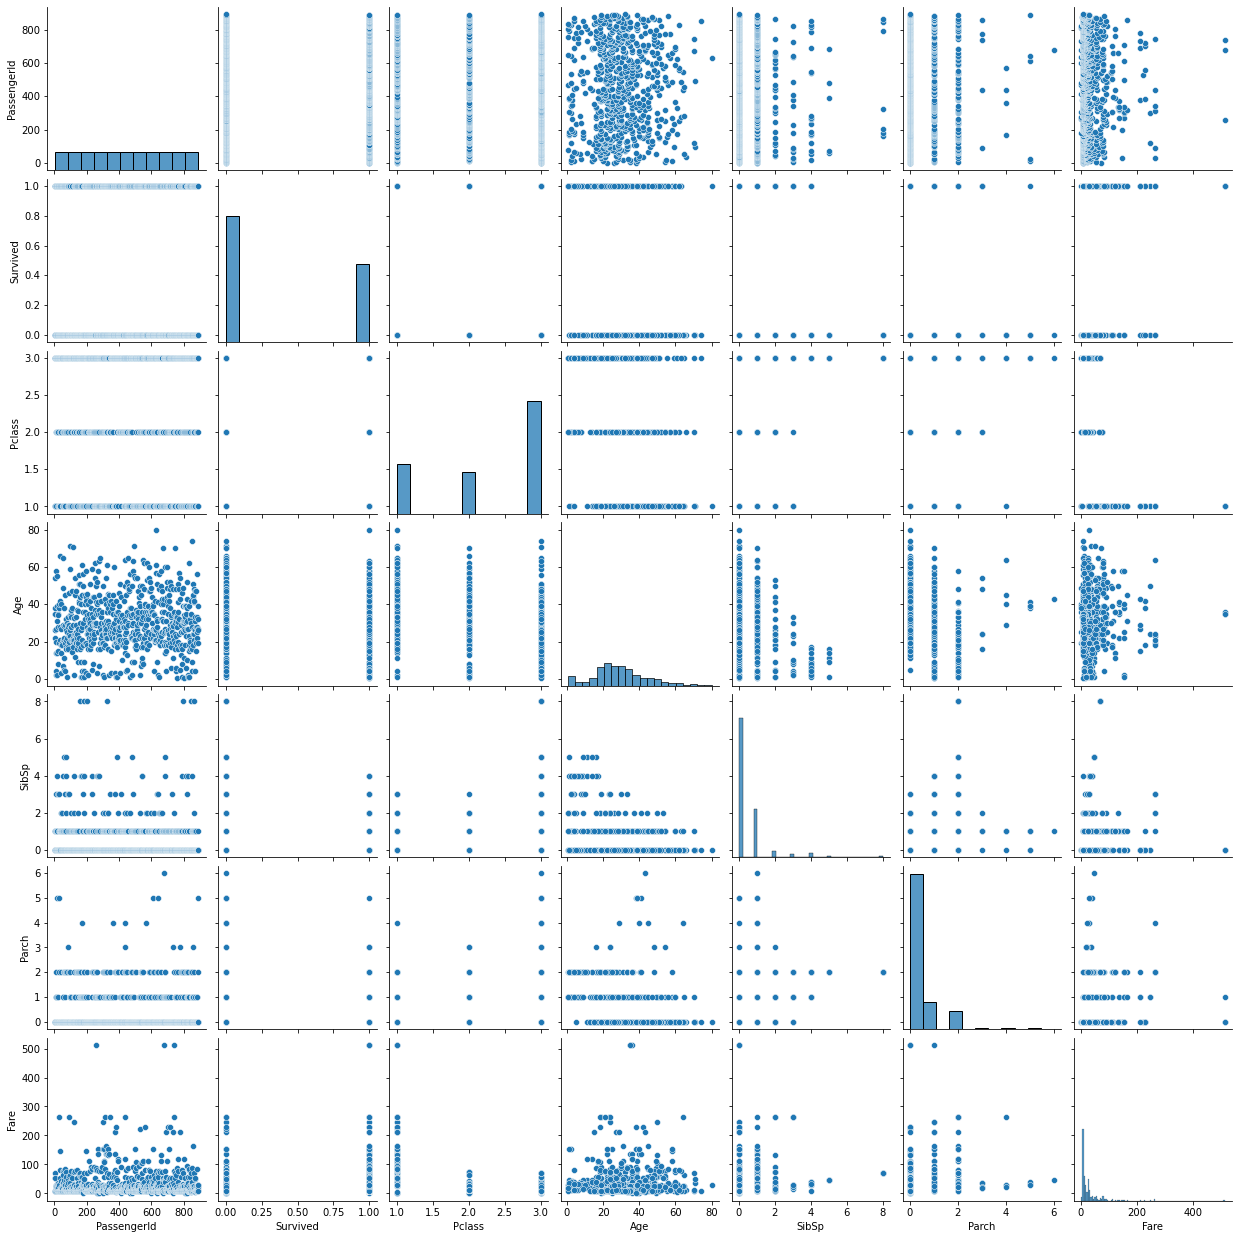

In [12]:
sns.pairplot(data)

# Missing Value Treatment

In [13]:
((data.isnull().sum()/891)*100).sort_values(ascending=False)

Cabin          77.104377
Age            19.865320
Embarked        0.224467
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
dtype: float64

In [14]:
data[data['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [15]:
data.groupby(['Embarked','Pclass']).median()['Fare']

Embarked  Pclass
C         1         78.2667
          2         24.0000
          3          7.8958
Q         1         90.0000
          2         12.3500
          3          7.7500
S         1         52.0000
          2         13.5000
          3          8.0500
Name: Fare, dtype: float64

In [16]:
data['Embarked'].mode()

0    S
dtype: object

In [17]:
data['Embarked'] = np.where(data['Embarked'].isnull(),'C',data['Embarked'])

In [18]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [19]:
data[data['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [20]:
data[data['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [21]:
data.groupby(['Pclass','SibSp']).median()['Age']

Pclass  SibSp
1       0        37.0
        1        38.0
        2        44.0
        3        23.0
2       0        30.0
        1        29.0
        2        23.5
        3        30.0
3       0        26.0
        1        25.0
        2        19.5
        3         6.0
        4         6.5
        5        11.0
        8         NaN
Name: Age, dtype: float64

<AxesSubplot:xlabel='Age', ylabel='Count'>

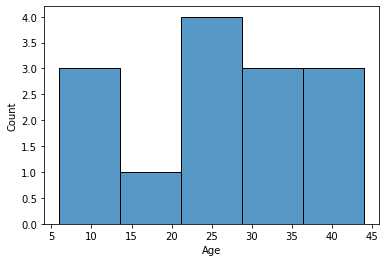

In [22]:
sns.histplot(data.groupby(['Pclass','SibSp']).median()['Age'])

In [23]:
data[data['Age'].isnull() & (data['Pclass']==3) & (data['SibSp']==8)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [24]:
data['Age'] = np.where(((data['Age'].isnull()) & (data['Pclass']==1) & (data['SibSp']==0)),37,data['Age'])

In [25]:
data['Age'] = np.where(((data['Age'].isnull()) & (data['Pclass']==1) & (data['SibSp']==1)),38,data['Age'])
data['Age'] = np.where(((data['Age'].isnull()) & (data['Pclass']==2) & (data['SibSp']==0)),30,data['Age'])
data['Age'] = np.where(((data['Age'].isnull()) & (data['Pclass']==3) & (data['SibSp']==0)),26,data['Age'])
data['Age'] = np.where(((data['Age'].isnull()) & (data['Pclass']==3) & (data['SibSp']==1)),25,data['Age'])
data['Age'] = np.where(((data['Age'].isnull()) & (data['Pclass']==3) & (data['SibSp']==2)),19,data['Age'])
data['Age'] = np.where(((data['Age'].isnull()) & (data['Pclass']==3) & (data['SibSp']==3)),6,data['Age'])

In [26]:
data['Age'].isnull().sum()

7

In [27]:
data['Age'] = np.where(((data['Age'].isnull()) & (data['Pclass']==1) & (data['SibSp']==8)),26.0,data['Age'])

In [28]:
data['Cabin'].isnull().sum()

687

In [29]:
# Its better to delete the cabin

In [30]:
data.drop(columns=['Cabin'],inplace=True)

In [31]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            7
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [32]:
data['Age'].median()

26.0

In [33]:
data['Age'] = np.where(((data['Age'].isnull())&(data['Pclass']==3)&(data['SibSp']==8)),26.0,data['Age'])

In [34]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# Outlier Treatment 

<AxesSubplot:xlabel='Age'>

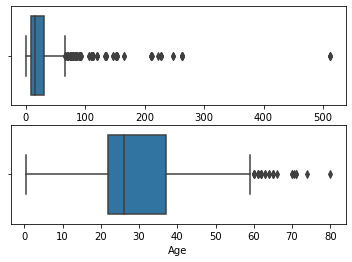

In [35]:
plt.subplot(2,1,1)
sns.boxplot(x='Fare',data=data)
plt.subplot(2,1,2)
sns.boxplot(x='Age',data=data)

<AxesSubplot:xlabel='PassengerId', ylabel='Fare'>

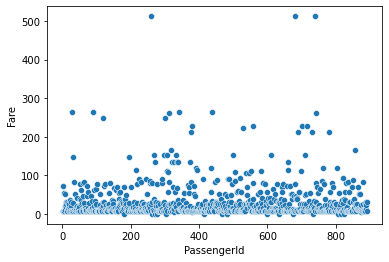

In [36]:
sns.scatterplot(x='PassengerId',y='Fare',data=data)

<AxesSubplot:xlabel='PassengerId', ylabel='Age'>

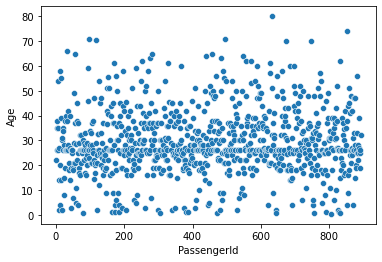

In [37]:
sns.scatterplot(x='PassengerId',y='Age',data=data)

In [38]:
data[data['Fare']>500]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,C


In [39]:
# Its better to drop the three rows

data.drop([258,679,737], axis=0, inplace=True)

<AxesSubplot:xlabel='PassengerId', ylabel='Fare'>

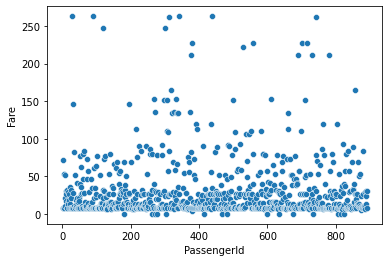

In [40]:
sns.scatterplot(x='PassengerId',y='Fare',data=data)

# Feature Selection

In [41]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [42]:
data.drop(columns=['PassengerId','Name','Ticket'],inplace=True)

In [43]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


# Feature Engineering

In [44]:
data=pd.get_dummies(data)

In [45]:
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [46]:
del data['Sex_female']

In [47]:
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,0,1
1,1,1,38.0,1,0,71.2833,0,1,0,0
2,1,3,26.0,0,0,7.9250,0,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,0,1


# Train Test Split

In [48]:
x=data.drop(columns=['Survived'])
y=data['Survived']

In [49]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x,y,train_size=0.8, stratify=y, random_state=3)

In [50]:
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(710, 9) (178, 9) (710,) (178,)



# Logistic Regression Model

In [51]:
from sklearn.linear_model import LogisticRegression
model_lr=LogisticRegression(max_iter=500)

In [52]:
model_lr.fit(train_x,train_y)

LogisticRegression(max_iter=500)

In [53]:
# Hard predictions
pred_y_lr=model_lr.predict(test_x)

In [54]:
pd.DataFrame({'Actual':test_y,'Predicted':pred_y_lr}).head(20)

,Actual,Predicted
178,0,0
838,1,0
650,0,0
644,1,1
159,0,0
836,0,0
708,1,1
273,0,1
859,0,0
315,1,1


In [55]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score,f1_score

In [56]:
def validation(actual,pred):
    print('Confusion Matrix\n',confusion_matrix(actual,pred))
    print('\nAccuracy:',accuracy_score(actual,pred))
    print('\nRecall :',recall_score(actual,pred))
    print('\nPrecision :',precision_score(actual,pred))
    print('\nF1 Score :',f1_score(actual,pred))

In [57]:
validation(test_y,pred_y_lr)

Confusion Matrix
 [[95 15]
 [19 49]]

Accuracy: 0.8089887640449438

Recall : 0.7205882352941176

Precision : 0.765625

F1 Score : 0.7424242424242423


# ROC Curve

In [58]:
from sklearn.metrics import roc_auc_score, roc_curve
auc=roc_auc_score(test_y,pred_y_lr)

In [59]:
auc

0.7921122994652406

In [60]:
# Soft Predictions

In [61]:
pred_y_lr_soft=model_lr.predict_proba(test_x)

In [62]:
pred_y_lr_soft=pred_y_lr_soft[:,1]

In [63]:
pred_y_lr_soft

array([0.26137888, 0.07635512, 0.1138234 , 0.78644433, 0.00557379,
       0.13920912, 0.93478191, 0.53104284, 0.16486269, 0.6269659 ,
       0.12418899, 0.14078104, 0.16486269, 0.77413658, 0.55738788,
       0.1138234 , 0.68567527, 0.69252745, 0.73132165, 0.1630748 ,
       0.07783996, 0.96337425, 0.09100075, 0.68566634, 0.14289916,
       0.14326166, 0.15011479, 0.1648646 , 0.11753997, 0.14521841,
       0.11377184, 0.95339551, 0.54395303, 0.16981941, 0.6237637 ,
       0.08474731, 0.82185881, 0.18220067, 0.90121514, 0.09932167,
       0.2774335 , 0.29808828, 0.14261176, 0.55935183, 0.751427  ,
       0.11466229, 0.65897933, 0.10011581, 0.45262686, 0.46215223,
       0.2764781 , 0.8506073 , 0.68566634, 0.5864037 , 0.46100669,
       0.11754888, 0.18210657, 0.85754675, 0.30041017, 0.73358182,
       0.18964701, 0.26022662, 0.08995204, 0.08125049, 0.17387274,
       0.04858339, 0.1648646 , 0.1138234 , 0.26958262, 0.63016561,
       0.18875831, 0.23574123, 0.87091434, 0.07783996, 0.32060

In [64]:
pd.DataFrame({'Actual':test_y,'Predicted':pred_y_lr,'Soft Pred':pred_y_lr_soft}).head(20)

,Actual,Predicted,Soft Pred
178,0,0,0.261379
838,1,0,0.076355
650,0,0,0.113823
644,1,1,0.786444
159,0,0,0.005574
836,0,0,0.139209
708,1,1,0.934782
273,0,1,0.531043
859,0,0,0.164863
315,1,1,0.626966


In [65]:
fpr,tpr,thrshold=roc_curve(test_y, pred_y_lr_soft)

In [66]:
roc_df=pd.DataFrame({'TPR':tpr,'FPR':fpr,'Threshold':thrshold})

In [67]:
roc_df.sort_values(by=['TPR'],ascending=False)

,TPR,FPR,Threshold
64,1.000000,1.000000,0.005574
63,1.000000,0.954545,0.065498
62,0.985294,0.954545,0.068700
61,0.985294,0.945455,0.076355
60,0.970588,0.945455,0.076424
...,...,...,...
4,0.308824,0.009091,0.797029
2,0.264706,0.000000,0.842349
3,0.264706,0.009091,0.821859
1,0.014706,0.000000,0.963374


Area Under The Curve : 0.7921122994652406


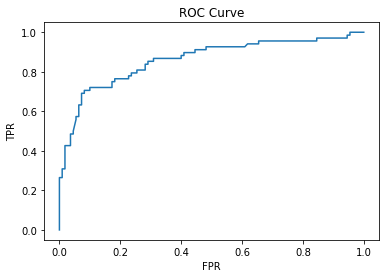

In [68]:
plt.plot(fpr,tpr)
plt.xlabel("FPR")
plt.ylabel('TPR')
plt.title('ROC Curve')
print('Area Under The Curve :',auc)
plt.show()

In [69]:
# Let us change the classified cutoff 

In [70]:
threshold=0.45
pred_y_soft_new=(pred_y_lr_soft>=threshold).astype(int)

In [71]:
pred_y_soft_new

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0])

In [72]:
pd.DataFrame({'Actual':test_y,'Hard Pred(0.5)':pred_y_lr,'Hard Pred(0.45)':pred_y_soft_new}).head(20)

,Actual,Hard Pred(0.5),Hard Pred(0.45)
178,0,0,0
838,1,0,0
650,0,0,0
644,1,1,1
159,0,0,0
836,0,0,0
708,1,1,1
273,0,1,1
859,0,0,0
315,1,1,1


In [73]:
validation(test_y,pred_y_soft_new)

Confusion Matrix
 [[88 22]
 [16 52]]

Accuracy: 0.7865168539325843

Recall : 0.7647058823529411

Precision : 0.7027027027027027

F1 Score : 0.7323943661971832


# NAIVE BAYES MODEL

In [74]:
print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)

(710, 9) (710,) (178, 9) (178,)


In [75]:
from sklearn.naive_bayes import GaussianNB
model_nb=GaussianNB()

In [76]:
model_nb.fit(train_x, train_y)

GaussianNB()

In [77]:
y_pred_nb= model_nb.predict(test_x)

In [78]:
pd.DataFrame({'Actual': test_y,'LR Pred':pred_y_lr,'NB pred': y_pred_nb}).head(20)

,Actual,LR Pred,NB pred
178,0,0,0
838,1,0,0
650,0,0,0
644,1,1,1
159,0,0,0
836,0,0,0
708,1,1,1
273,0,1,1
859,0,0,1
315,1,1,1


In [79]:
print('Validation for NB model')
validation(test_y,y_pred_nb)
print('\nValidation for LR model')
validation(test_y,pred_y_lr)

Validation for NB model
Confusion Matrix
 [[80 30]
 [16 52]]

Accuracy: 0.7415730337078652

Recall : 0.7647058823529411

Precision : 0.6341463414634146

F1 Score : 0.6933333333333332

Validation for LR model
Confusion Matrix
 [[95 15]
 [19 49]]

Accuracy: 0.8089887640449438

Recall : 0.7205882352941176

Precision : 0.765625

F1 Score : 0.7424242424242423


In [80]:
y_pred_nb_soft=model_nb.predict_proba(test_x)

In [81]:
y_pred_nb_soft[:,1]

array([8.98325288e-02, 7.95691847e-02, 4.52666810e-02, 9.30293947e-01,
       1.04214733e-20, 4.88098108e-02, 9.99794687e-01, 9.13360014e-01,
       5.38430105e-01, 6.29837412e-01, 5.16882788e-01, 5.25229390e-01,
       5.38430105e-01, 9.98872611e-01, 9.02864831e-01, 4.52666810e-02,
       7.74031058e-01, 1.75444074e-01, 7.85003537e-01, 5.23032261e-02,
       4.08660614e-02, 9.99015419e-01, 5.68150629e-04, 7.74031648e-01,
       8.71312385e-02, 8.71295137e-02, 5.05623605e-02, 5.38430125e-01,
       4.44532198e-02, 4.96017026e-02, 4.52693324e-02, 9.28594619e-01,
       2.44680678e-01, 5.32631802e-02, 9.93959703e-01, 4.09033027e-02,
       7.57543523e-01, 5.01775778e-02, 9.99391650e-01, 4.15421325e-02,
       2.26194874e-02, 1.04532396e-02, 8.71577863e-02, 9.83084138e-01,
       9.99911189e-01, 5.11799124e-01, 6.40395385e-01, 4.47312254e-02,
       1.36016252e-04, 2.52797047e-01, 6.14975634e-01, 9.98919348e-01,
       7.74031648e-01, 7.66103022e-01, 3.67141262e-01, 5.13010698e-01,
      

In [82]:
pd.DataFrame({'Actual': test_y,'NB Soft Pred':y_pred_nb_soft[:,1],'NB pred': y_pred_nb}).head(20)

,Actual,NB Soft Pred,NB pred
178,0,8.983253e-02,0
838,1,7.956918e-02,0
650,0,4.526668e-02,0
644,1,9.302939e-01,1
159,0,1.042147e-20,0
836,0,4.880981e-02,0
708,1,9.997947e-01,1
273,0,9.133600e-01,1
859,0,5.384301e-01,1
315,1,6.298374e-01,1


In [83]:
# Plot the ROC Curve
fpr_np,tpr_nb,threshold_nb=roc_curve(test_y,y_pred_nb_soft[:,1])

LR AUC 0.7921122994652406
NB AUC 0.7459893048128342


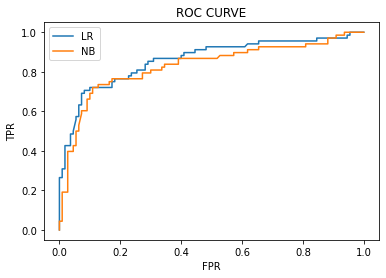

In [84]:
plt.plot(fpr,tpr, label='LR')
plt.plot(fpr_np,tpr_nb, label='NB')
plt.legend()
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC CURVE')
print('LR AUC',roc_auc_score(test_y,pred_y_lr))
print('NB AUC',roc_auc_score(test_y,y_pred_nb))
plt.show()

In [85]:
# Let us change the classified cutoff

In [86]:
threshold=0.45
y_pred_nb_soft_new=(y_pred_nb_soft[:,1]>=threshold).astype(int)

In [87]:
y_pred_nb_soft_new

array([0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0])

In [88]:
pd.DataFrame({'Actual': test_y,'NB pred(0.5)': y_pred_nb,'NB pred(0.45)':y_pred_nb_soft_new}).head(20)

,Actual,NB pred(0.5),NB pred(0.45)
178,0,0,0
838,1,0,0
650,0,0,0
644,1,1,1
159,0,0,0
836,0,0,0
708,1,1,1
273,0,1,1
859,0,1,1
315,1,1,1


In [89]:
validation(test_y,y_pred_nb_soft_new)

Confusion Matrix
 [[80 30]
 [16 52]]

Accuracy: 0.7415730337078652

Recall : 0.7647058823529411

Precision : 0.6341463414634146

F1 Score : 0.6933333333333332



# DECISION TREE

In [90]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV 

params = {'criterion':['entropy','gini'],
         'max_depth':[2,3,4,5]}


In [91]:
gscv= GridSearchCV(estimator=DecisionTreeClassifier(),param_grid=params, scoring='accuracy',verbose=3,cv=2)
#model_dt=DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [92]:
gscv.fit(train_x,train_y)

Fitting 2 folds for each of 8 candidates, totalling 16 fits
[CV 1/2] END ....criterion=entropy, max_depth=2;, score=0.752 total time=   0.0s
[CV 2/2] END ....criterion=entropy, max_depth=2;, score=0.808 total time=   0.0s
[CV 1/2] END ....criterion=entropy, max_depth=3;, score=0.789 total time=   0.0s
[CV 2/2] END ....criterion=entropy, max_depth=3;, score=0.854 total time=   0.0s
[CV 1/2] END ....criterion=entropy, max_depth=4;, score=0.803 total time=   0.0s
[CV 2/2] END ....criterion=entropy, max_depth=4;, score=0.848 total time=   0.0s
[CV 1/2] END ....criterion=entropy, max_depth=5;, score=0.761 total time=   0.0s
[CV 2/2] END ....criterion=entropy, max_depth=5;, score=0.834 total time=   0.0s
[CV 1/2] END .......criterion=gini, max_depth=2;, score=0.752 total time=   0.0s
[CV 2/2] END .......criterion=gini, max_depth=2;, score=0.808 total time=   0.0s
[CV 1/2] END .......criterion=gini, max_depth=3;, score=0.752 total time=   0.0s
[CV 2/2] END .......criterion=gini, max_depth=3;,

GridSearchCV(cv=2, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [2, 3, 4, 5]},
             scoring='accuracy', verbose=3)

In [93]:
gscv.best_params_

{'criterion': 'entropy', 'max_depth': 4}

In [94]:
model_dt=DecisionTreeClassifier(**gscv.best_params_)

In [95]:
model_dt.fit(train_x,train_y)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [96]:
y_pred_dt= model_dt.predict(test_x)

In [97]:
validation(test_y,y_pred_dt)

Confusion Matrix
 [[91 19]
 [15 53]]

Accuracy: 0.8089887640449438

Recall : 0.7794117647058824

Precision : 0.7361111111111112

F1 Score : 0.7571428571428572


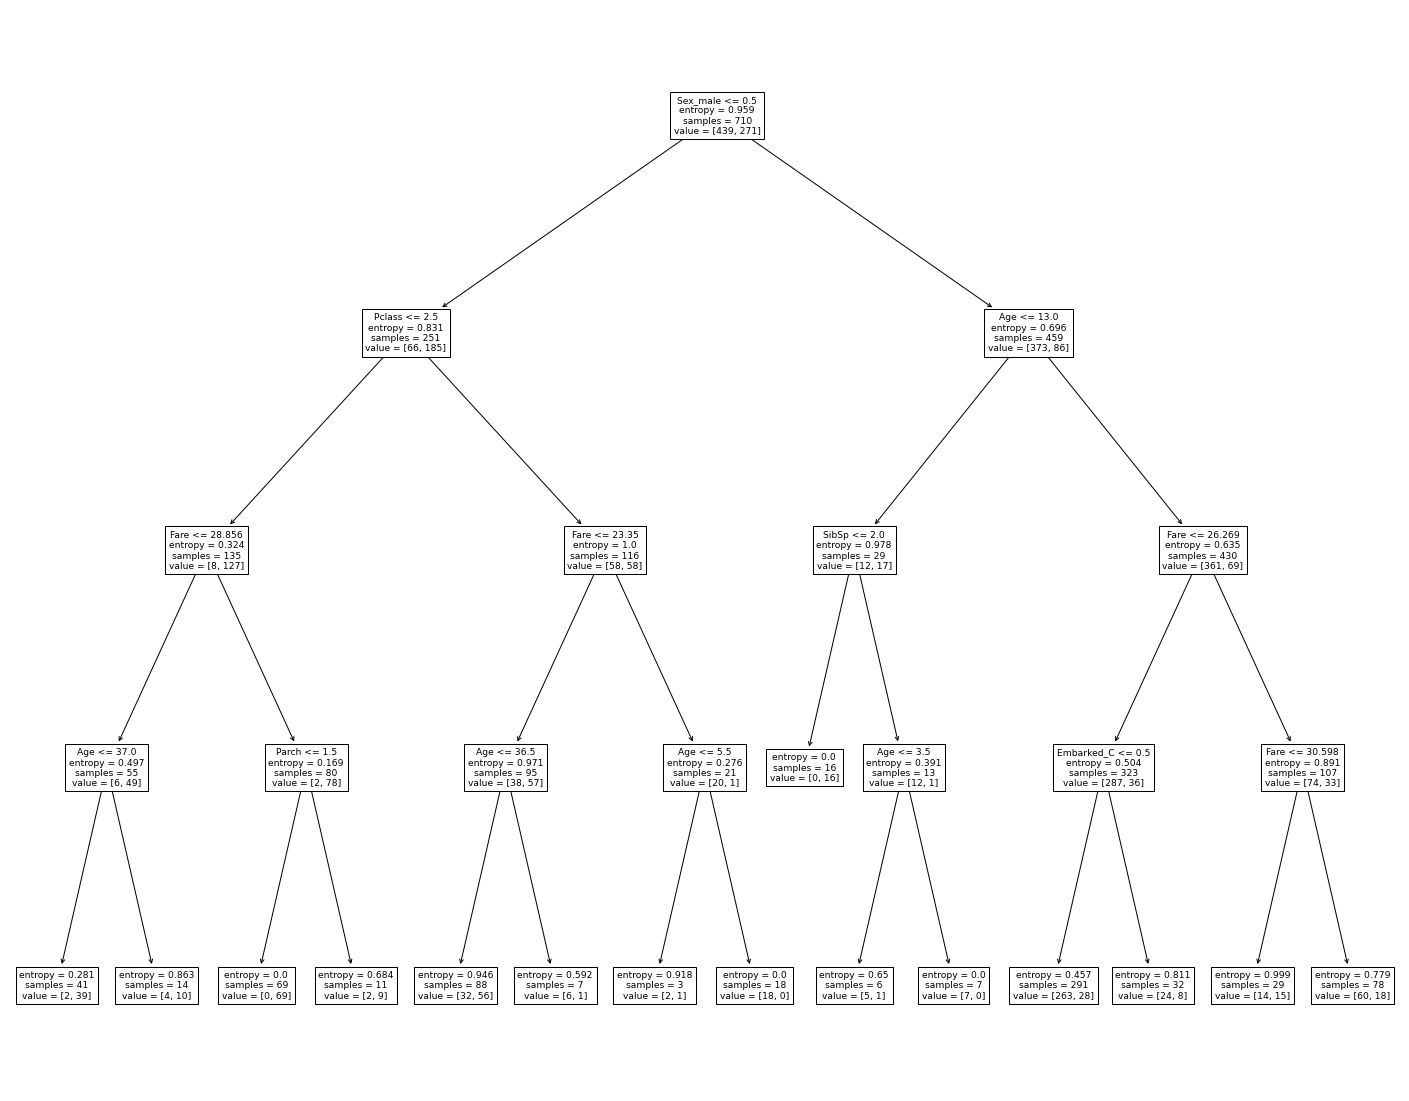

In [98]:
from sklearn import tree
plt.figure(figsize=(25,20))
tree.plot_tree(model_dt, feature_names=train_x.columns)
plt.show()

In [99]:
y_pred_dt_soft= model_dt.predict_proba(test_x)

In [100]:
y_pred_dt_soft[:,1]

array([0.09621993, 0.23076923, 0.09621993, 0.63636364, 0.23076923,
       0.09621993, 1.        , 0.51724138, 0.25      , 0.63636364,
       0.25      , 0.25      , 0.25      , 1.        , 0.51724138,
       0.09621993, 0.63636364, 0.95121951, 0.95121951, 0.09621993,
       0.09621993, 1.        , 0.        , 0.63636364, 0.09621993,
       0.09621993, 0.09621993, 0.25      , 0.09621993, 0.09621993,
       0.09621993, 0.95121951, 0.63636364, 0.09621993, 0.23076923,
       0.09621993, 0.63636364, 1.        , 1.        , 0.09621993,
       0.        , 0.63636364, 0.09621993, 0.23076923, 1.        ,
       0.25      , 0.63636364, 0.09621993, 0.        , 0.09621993,
       1.        , 1.        , 0.63636364, 0.71428571, 0.23076923,
       0.25      , 0.23076923, 0.95121951, 0.51724138, 0.63636364,
       0.23076923, 0.51724138, 0.23076923, 0.09621993, 0.09621993,
       0.23076923, 0.25      , 0.09621993, 0.23076923, 1.        ,
       0.09621993, 0.09621993, 1.        , 0.09621993, 0.09621

In [101]:
# Plot ROC and AUC curve

fpr_dt,tpr_dt,threshold_dt=roc_curve(test_y,y_pred_dt_soft[:,1])

LR AUC 0.7921122994652406 LR Model Score 0.8042253521126761
NB AUC 0.7459893048128342 NB Model Score 0.7647887323943662
DT AUC 0.8033422459893047 DT Model Score 0.8436619718309859


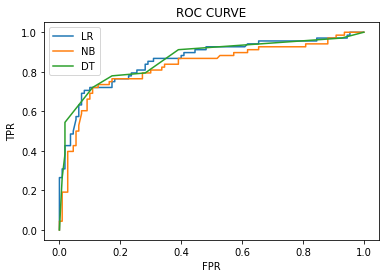

In [102]:
plt.plot(fpr,tpr, label='LR')
plt.plot(fpr_np,tpr_nb, label='NB')
plt.plot(fpr_dt,tpr_dt, label='DT')
plt.legend()
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC CURVE')
print('LR AUC',roc_auc_score(test_y,pred_y_lr),'LR Model Score',model_lr.score(train_x,train_y))
print('NB AUC',roc_auc_score(test_y,y_pred_nb),'NB Model Score',model_nb.score(train_x,train_y))
print('DT AUC',roc_auc_score(test_y,y_pred_dt),'DT Model Score',model_dt.score(train_x,train_y))
plt.show()

# RANDOM FOREST (ENSEMBLE MODEL - BAGGING)

In [103]:
from sklearn.ensemble import RandomForestClassifier

In [104]:
params = {'n_estimators':[80,100,120,130,140], 'max_depth':[2,3,4,5], 'criterion':['entropy']}

gscv= GridSearchCV(estimator=RandomForestClassifier(),param_grid=params, scoring='accuracy', verbose=1,cv=2)

In [105]:
gscv.fit(train_x,train_y)

Fitting 2 folds for each of 20 candidates, totalling 40 fits


GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy'], 'max_depth': [2, 3, 4, 5],
                         'n_estimators': [80, 100, 120, 130, 140]},
             scoring='accuracy', verbose=1)

In [106]:
gscv.best_params_

{'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 80}

In [107]:
model_rf=RandomForestClassifier(**gscv.best_params_)

In [108]:
model_rf.fit(train_x,train_y)

RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=80)

In [109]:
y_pred_rf=model_rf.predict(test_x)

In [110]:
validation(test_y,y_pred_rf)

Confusion Matrix
 [[101   9]
 [ 22  46]]

Accuracy: 0.8258426966292135

Recall : 0.6764705882352942

Precision : 0.8363636363636363

F1 Score : 0.7479674796747968


In [111]:
y_pred_rf_soft = model_rf.predict_proba(test_x)

In [112]:
y_pred_rf_soft[:,1]

array([0.21669679, 0.31298701, 0.10758998, 0.72546765, 0.0860969 ,
       0.11648463, 0.90134926, 0.41156556, 0.18133626, 0.49456949,
       0.16198756, 0.14270049, 0.18133626, 0.86990792, 0.37569693,
       0.10758998, 0.64953959, 0.78125814, 0.81325946, 0.12591474,
       0.11845202, 0.94127411, 0.19470516, 0.65318542, 0.11787485,
       0.10593608, 0.18630011, 0.16004337, 0.14914949, 0.11565269,
       0.12278125, 0.8773206 , 0.5207062 , 0.12502428, 0.48807264,
       0.19776421, 0.70184543, 0.48655046, 0.95787235, 0.13928746,
       0.16203941, 0.40036862, 0.13968878, 0.45705363, 0.8655949 ,
       0.14577725, 0.48996085, 0.19285327, 0.11874938, 0.16910298,
       0.55424974, 0.92162561, 0.65318542, 0.7566847 , 0.37698685,
       0.1040545 , 0.23636316, 0.84477785, 0.32364537, 0.67069534,
       0.28938349, 0.31907267, 0.19364807, 0.11845202, 0.17110542,
       0.24721722, 0.16004337, 0.10758998, 0.36680982, 0.62785485,
       0.2155194 , 0.2153365 , 0.8156503 , 0.11845202, 0.20100

In [113]:
# Plot ROC and AUC curve

fpr_rf,tpr_rf,threshold_rf=roc_curve(test_y,y_pred_rf_soft[:,1])

LR AUC 0.7921122994652406 LR Model Score 0.8042253521126761
NB AUC 0.7459893048128342 NB Model Score 0.7647887323943662
DT AUC 0.8033422459893047 DT Model Score 0.8436619718309859
RF AUC 0.7973262032085562 RF Model Score 0.856338028169014


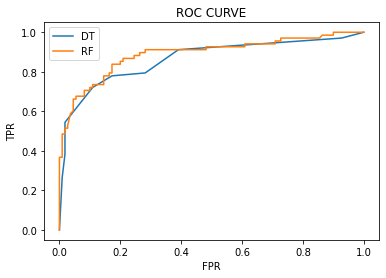

In [114]:
#plt.plot(fpr,tpr, label='LR')
#plt.plot(fpr_np,tpr_nb, label='NB')
plt.plot(fpr_dt,tpr_dt, label='DT')
plt.plot(fpr_rf,tpr_rf, label='RF')
plt.legend()
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC CURVE')
print('LR AUC',roc_auc_score(test_y,pred_y_lr),'LR Model Score',model_lr.score(train_x,train_y))
print('NB AUC',roc_auc_score(test_y,y_pred_nb),'NB Model Score',model_nb.score(train_x,train_y))
print('DT AUC',roc_auc_score(test_y,y_pred_dt),'DT Model Score',model_dt.score(train_x,train_y))
print('RF AUC',roc_auc_score(test_y,y_pred_rf),'RF Model Score',model_rf.score(train_x,train_y))
plt.show()

LR AUC 0.7921122994652406 LR Model Score 0.8089887640449438
NB AUC 0.7459893048128342 NB Model Score 0.7415730337078652
DT AUC 0.8033422459893047 DT Model Score 0.8089887640449438
RF AUC 0.7973262032085562 RF Model Score 0.8258426966292135


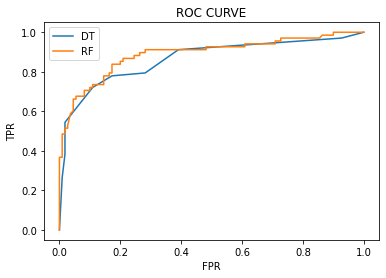

In [115]:
# Test data
#plt.plot(fpr,tpr, label='LR')
#plt.plot(fpr_np,tpr_nb, label='NB')
plt.plot(fpr_dt,tpr_dt, label='DT')
plt.plot(fpr_rf,tpr_rf, label='RF')
plt.legend()
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC CURVE')
print('LR AUC',roc_auc_score(test_y,pred_y_lr),'LR Model Score',model_lr.score(test_x,test_y))
print('NB AUC',roc_auc_score(test_y,y_pred_nb),'NB Model Score',model_nb.score(test_x,test_y))
print('DT AUC',roc_auc_score(test_y,y_pred_dt),'DT Model Score',model_dt.score(test_x,test_y))
print('RF AUC',roc_auc_score(test_y,y_pred_rf),'RF Model Score',model_rf.score(test_x,test_y))
plt.show()

# ENSEMBLE MODEL (BOOSTING)

In [116]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

params = {'n_estimators':[80,100,120]}


In [117]:
gscv_ada = GridSearchCV(estimator=AdaBoostClassifier(),
                       param_grid=params,
                       scoring='accuracy',
                       verbose=1,
                       cv=2)


In [118]:
gscv_ada.fit(x,y)

Fitting 2 folds for each of 3 candidates, totalling 6 fits


GridSearchCV(cv=2, estimator=AdaBoostClassifier(),
             param_grid={'n_estimators': [80, 100, 120]}, scoring='accuracy',
             verbose=1)

In [119]:
gscv_ada.best_params_

{'n_estimators': 100}

In [120]:
model_ada = AdaBoostClassifier(**gscv_ada.best_params_)

In [121]:
model_ada.fit(train_x,train_y)

AdaBoostClassifier(n_estimators=100)

In [122]:
model_ada.score(test_x,test_y)

0.8202247191011236

# Gradient boosting

In [123]:
params = {'learning_rate':[0.01,1],
         'n_estimators':[100,120,130],
         'max_depth':[2,3]}

In [124]:
gscv_gb = GridSearchCV(estimator=GradientBoostingClassifier(),
                       param_grid=params,
                       scoring='accuracy',
                       verbose=1,
                      cv=2)


In [125]:
gscv_gb.fit(x,y)

Fitting 2 folds for each of 12 candidates, totalling 24 fits


GridSearchCV(cv=2, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 1], 'max_depth': [2, 3],
                         'n_estimators': [100, 120, 130]},
             scoring='accuracy', verbose=1)

In [126]:
gscv_gb.best_params_

{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 130}

In [127]:
model_gb=GradientBoostingClassifier(**gscv_gb.best_params_)

In [128]:
model_gb.fit(train_x,train_y)

GradientBoostingClassifier(learning_rate=0.01, n_estimators=130)

In [129]:
model_gb.score(test_x,test_y)

0.8258426966292135

In [130]:
y_pred_gb = model_gb.predict(test_x)

In [131]:
validation(test_y,y_pred_gb)

Confusion Matrix
 [[98 12]
 [19 49]]

Accuracy: 0.8258426966292135

Recall : 0.7205882352941176

Precision : 0.8032786885245902

F1 Score : 0.7596899224806202


# ADAboost with different depth

In [132]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

params = {'n_estimators':[100,120,130,140]}


In [133]:
ada= AdaBoostClassifier(DecisionTreeClassifier(max_depth=2))
gscv_ada = GridSearchCV(estimator=ada,
                       param_grid=params,
                       scoring='accuracy',
                       verbose=1,
                       cv=2)


In [134]:
gscv_ada.fit(x,y)

Fitting 2 folds for each of 4 candidates, totalling 8 fits


GridSearchCV(cv=2,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2)),
             param_grid={'n_estimators': [100, 120, 130, 140]},
             scoring='accuracy', verbose=1)

In [135]:
gscv_ada.best_params_

{'n_estimators': 100}

In [136]:
model_ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2),n_estimators=100)

In [137]:
model_ada.fit(train_x,train_y)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                   n_estimators=100)

In [138]:
model_ada.score(test_x,test_y)

0.7752808988764045

# XG Boost

In [139]:
#pip install xgboost


In [140]:
from xgboost import XGBClassifier

In [141]:
xgb = XGBClassifier()

In [142]:
params

{'n_estimators': [100, 120, 130, 140]}

In [143]:
gscv_xgb = GridSearchCV(estimator=xgb,
                       param_grid= params,
                       scoring='accuracy',
                       verbose=1,
                       cv=2)

In [144]:
gscv_xgb.fit(x,y)

Fitting 2 folds for each of 4 candidates, totalling 8 fits
[14:45:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:45:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:45:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:45:51] 

GridSearchCV(cv=2,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                                     validate_parameters=None, verbosity=None),
             param_grid={'n_estimators': [100, 120, 130, 140]},
             scoring='accuracy', verbose=1)

In [145]:
gscv_xgb.best_params_

{'n_estimators': 100}

In [146]:
model_xgb = XGBClassifier(**gscv_xgb.best_params_)

In [147]:
model_xgb.fit(train_x,train_y)

[14:45:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [148]:
y_pred_xgb = model_xgb.predict(test_x)

In [149]:
validation(test_y,y_pred_xgb)

Confusion Matrix
 [[95 15]
 [20 48]]

Accuracy: 0.8033707865168539

Recall : 0.7058823529411765

Precision : 0.7619047619047619

F1 Score : 0.7328244274809159


## KNN Model

In [150]:
from sklearn.preprocessing import StandardScaler

In [151]:
scaler = StandardScaler()

In [152]:
train_x_s= scaler.fit_transform(train_x)

In [153]:
test_x_s = scaler.fit_transform(test_x)

In [154]:
from sklearn.neighbors import KNeighborsClassifier

In [155]:
knn = KNeighborsClassifier(n_neighbors=5)

In [156]:
knn.fit(train_x_s,train_y)

KNeighborsClassifier()

In [157]:
knn.score(test_x_s,test_y)

0.8370786516853933

In [158]:
y_pred_knn = knn.predict(test_x_s)

In [159]:
validation(test_y,y_pred_knn)

Confusion Matrix
 [[96 14]
 [15 53]]

Accuracy: 0.8370786516853933

Recall : 0.7794117647058824

Precision : 0.7910447761194029

F1 Score : 0.7851851851851852


In [160]:
# Tuning n_neighbors

In [161]:
params={'n_neighbors':[3,5,7,9,11]}

In [162]:
gscv_knn = GridSearchCV(estimator=knn,
                       param_grid= params,
                       scoring='accuracy',
                       verbose=1,
                       cv=2)

In [163]:
gscv_knn.fit(x,y)

Fitting 2 folds for each of 5 candidates, totalling 10 fits


GridSearchCV(cv=2, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11]}, scoring='accuracy',
             verbose=1)

In [164]:
gscv_knn.best_params_

{'n_neighbors': 7}

In [165]:
model_knn = KNeighborsClassifier(**gscv_knn.best_params_)

In [166]:
model_knn.fit(train_x_s,train_y)

KNeighborsClassifier(n_neighbors=7)

In [167]:
y_pred_knn = model_knn.predict(test_x_s)

In [168]:
validation(test_y,y_pred_knn)

Confusion Matrix
 [[95 15]
 [16 52]]

Accuracy: 0.8258426966292135

Recall : 0.7647058823529411

Precision : 0.7761194029850746

F1 Score : 0.7703703703703704


In [169]:
y_pred_knn_soft = model_knn.predict_proba(test_x_s)

In [170]:
y_pred_knn_soft[:,1]

array([0.28571429, 0.57142857, 0.14285714, 0.71428571, 0.        ,
       0.        , 1.        , 0.42857143, 0.14285714, 0.28571429,
       0.14285714, 0.28571429, 0.14285714, 0.85714286, 0.42857143,
       0.14285714, 0.85714286, 0.42857143, 0.85714286, 0.14285714,
       0.        , 1.        , 0.        , 0.85714286, 0.        ,
       0.        , 0.14285714, 0.14285714, 0.28571429, 0.        ,
       0.14285714, 1.        , 0.57142857, 0.        , 0.57142857,
       0.14285714, 0.85714286, 0.71428571, 1.        , 0.28571429,
       0.14285714, 0.71428571, 0.        , 0.57142857, 1.        ,
       0.14285714, 0.57142857, 0.14285714, 0.28571429, 0.42857143,
       0.42857143, 1.        , 0.85714286, 0.85714286, 0.14285714,
       0.14285714, 0.14285714, 0.71428571, 0.42857143, 0.71428571,
       0.42857143, 0.14285714, 0.14285714, 0.        , 0.        ,
       0.57142857, 0.14285714, 0.14285714, 0.42857143, 0.57142857,
       0.28571429, 0.28571429, 0.85714286, 0.        , 0.     

In [171]:
# Plot ROC and AUC curve

fpr_knn,tpr_knn,threshold_knn=roc_curve(test_y,y_pred_knn_soft[:,1])

LR AUC 0.7921122994652406 LR Model Score 0.8042253521126761
NB AUC 0.7459893048128342 NB Model Score 0.7647887323943662
DT AUC 0.8033422459893047 DT Model Score 0.8436619718309859
RF AUC 0.7973262032085562 RF Model Score 0.856338028169014
KNN AUC 0.8141711229946523 KNN Model Score 0.8436619718309859


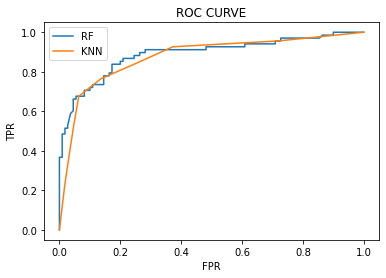

In [172]:
#plt.plot(fpr,tpr, label='LR')
#plt.plot(fpr_np,tpr_nb, label='NB')
#plt.plot(fpr_dt,tpr_dt, label='DT')
plt.plot(fpr_rf,tpr_rf, label='RF')
plt.plot(fpr_knn,tpr_knn, label='KNN')
plt.legend()
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC CURVE')
print('LR AUC',roc_auc_score(test_y,pred_y_lr),'LR Model Score',model_lr.score(train_x,train_y))
print('NB AUC',roc_auc_score(test_y,y_pred_nb),'NB Model Score',model_nb.score(train_x,train_y))
print('DT AUC',roc_auc_score(test_y,y_pred_dt),'DT Model Score',model_dt.score(train_x,train_y))
print('RF AUC',roc_auc_score(test_y,y_pred_rf),'RF Model Score',model_rf.score(train_x,train_y))
print('KNN AUC',roc_auc_score(test_y,y_pred_knn),'KNN Model Score',model_knn.score(train_x_s,train_y))
plt.show()

## SVM Support Vector Mechanism  (SVC- Support Vector Classifiers)

In [173]:
from sklearn.svm import SVC

In [174]:
params = {'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
          'C':[0.01,0.1],
         'gamma':[0.1,1],
         'degree':[3,4]}

In [175]:
gscv_svc = GridSearchCV(estimator= SVC(),
                       param_grid=params,
                       verbose=3,
                       scoring='accuracy',
                       cv=2)

In [176]:
gscv_svc.fit(train_x_s,train_y)

Fitting 2 folds for each of 32 candidates, totalling 64 fits
[CV 1/2] END C=0.01, degree=3, gamma=0.1, kernel=linear;, score=0.752 total time=   0.0s
[CV 2/2] END C=0.01, degree=3, gamma=0.1, kernel=linear;, score=0.823 total time=   0.0s
[CV 1/2] END C=0.01, degree=3, gamma=0.1, kernel=poly;, score=0.623 total time=   0.0s
[CV 2/2] END C=0.01, degree=3, gamma=0.1, kernel=poly;, score=0.623 total time=   0.0s
[CV 1/2] END C=0.01, degree=3, gamma=0.1, kernel=rbf;, score=0.617 total time=   0.0s
[CV 2/2] END C=0.01, degree=3, gamma=0.1, kernel=rbf;, score=0.620 total time=   0.0s
[CV 1/2] END C=0.01, degree=3, gamma=0.1, kernel=sigmoid;, score=0.617 total time=   0.0s
[CV 2/2] END C=0.01, degree=3, gamma=0.1, kernel=sigmoid;, score=0.620 total time=   0.0s
[CV 1/2] END C=0.01, degree=3, gamma=1, kernel=linear;, score=0.752 total time=   0.0s
[CV 2/2] END C=0.01, degree=3, gamma=1, kernel=linear;, score=0.823 total time=   0.0s
[CV 1/2] END C=0.01, degree=3, gamma=1, kernel=poly;, score=0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.01, 0.1], 'degree': [3, 4], 'gamma': [0.1, 1],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='accuracy', verbose=3)

In [177]:
gscv_svc.best_params_

{'C': 0.1, 'degree': 3, 'gamma': 0.1, 'kernel': 'linear'}

In [178]:
model_svc=SVC(**gscv_svc.best_params_)

In [179]:
model_svc.fit(train_x_s,train_y)

SVC(C=0.1, gamma=0.1, kernel='linear')

In [180]:
y_pred_svc=model_svc.predict(test_x_s)

In [181]:
validation(y_pred_svc,test_y)

Confusion Matrix
 [[95 21]
 [15 47]]

Accuracy: 0.797752808988764

Recall : 0.7580645161290323

Precision : 0.6911764705882353

F1 Score : 0.7230769230769231


# Neural Network

In [182]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [183]:
from keras.models import Sequential
from keras.layers import Dense

In [184]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

In [195]:
model = Sequential()
model.add(Dense(20, input_dim=9, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [196]:
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [197]:
history = model.fit(train_x, train_y, epochs=500, batch_size=800, verbose=1)

Epoch 1/500
1/1 [==============================] - 1s 1s/step - loss: 2.3881 - accuracy: 0.3817
Epoch 2/500
1/1 [==============================] - 0s 7ms/step - loss: 2.0371 - accuracy: 0.3817
Epoch 3/500
1/1 [==============================] - 0s 8ms/step - loss: 1.7084 - accuracy: 0.3817
Epoch 4/500
1/1 [==============================] - 0s 15ms/step - loss: 1.4315 - accuracy: 0.3817
Epoch 5/500
1/1 [==============================] - 0s 10ms/step - loss: 1.1882 - accuracy: 0.3817
Epoch 6/500
1/1 [==============================] - 0s 8ms/step - loss: 0.9775 - accuracy: 0.3817
Epoch 7/500
1/1 [==============================] - 0s 10ms/step - loss: 0.8124 - accuracy: 0.3803
Epoch 8/500
1/1 [==============================] - 0s 7ms/step - loss: 0.7065 - accuracy: 0.5803
Epoch 9/500
1/1 [==============================] - 0s 9ms/step - loss: 0.6672 - accuracy: 0.6352
Epoch 10/500
1/1 [==============================] - 0s 9ms/step - loss: 0.6826 - accuracy: 0.6155
Epoch 11/500
1/1 [=========

1/1 [==============================] - 0s 9ms/step - loss: 0.5990 - accuracy: 0.6887
Epoch 85/500
1/1 [==============================] - 0s 7ms/step - loss: 0.5987 - accuracy: 0.6901
Epoch 86/500
1/1 [==============================] - 0s 5ms/step - loss: 0.5984 - accuracy: 0.6859
Epoch 87/500
1/1 [==============================] - 0s 10ms/step - loss: 0.5982 - accuracy: 0.6859
Epoch 88/500
1/1 [==============================] - 0s 9ms/step - loss: 0.5979 - accuracy: 0.6901
Epoch 89/500
1/1 [==============================] - 0s 8ms/step - loss: 0.5977 - accuracy: 0.6930
Epoch 90/500
1/1 [==============================] - 0s 12ms/step - loss: 0.5974 - accuracy: 0.6915
Epoch 91/500
1/1 [==============================] - 0s 6ms/step - loss: 0.5971 - accuracy: 0.6915
Epoch 92/500
1/1 [==============================] - 0s 10ms/step - loss: 0.5968 - accuracy: 0.6930
Epoch 93/500
1/1 [==============================] - 0s 6ms/step - loss: 0.5965 - accuracy: 0.6901
Epoch 94/500
1/1 [============

1/1 [==============================] - 0s 7ms/step - loss: 0.5671 - accuracy: 0.7056
Epoch 167/500
1/1 [==============================] - 0s 10ms/step - loss: 0.5667 - accuracy: 0.7042
Epoch 168/500
1/1 [==============================] - 0s 6ms/step - loss: 0.5661 - accuracy: 0.7070
Epoch 169/500
1/1 [==============================] - 0s 10ms/step - loss: 0.5656 - accuracy: 0.7056
Epoch 170/500
1/1 [==============================] - 0s 8ms/step - loss: 0.5651 - accuracy: 0.7070
Epoch 171/500
1/1 [==============================] - 0s 7ms/step - loss: 0.5646 - accuracy: 0.7070
Epoch 172/500
1/1 [==============================] - 0s 7ms/step - loss: 0.5641 - accuracy: 0.7070
Epoch 173/500
1/1 [==============================] - 0s 10ms/step - loss: 0.5636 - accuracy: 0.7099
Epoch 174/500
1/1 [==============================] - 0s 19ms/step - loss: 0.5630 - accuracy: 0.7056
Epoch 175/500
1/1 [==============================] - 0s 8ms/step - loss: 0.5624 - accuracy: 0.7099
Epoch 176/500
1/1 [=

1/1 [==============================] - 0s 8ms/step - loss: 0.5058 - accuracy: 0.7451
Epoch 249/500
1/1 [==============================] - 0s 7ms/step - loss: 0.5047 - accuracy: 0.7465
Epoch 250/500
1/1 [==============================] - 0s 6ms/step - loss: 0.5036 - accuracy: 0.7437
Epoch 251/500
1/1 [==============================] - 0s 11ms/step - loss: 0.5027 - accuracy: 0.7408
Epoch 252/500
1/1 [==============================] - 0s 8ms/step - loss: 0.5015 - accuracy: 0.7451
Epoch 253/500
1/1 [==============================] - 0s 6ms/step - loss: 0.5006 - accuracy: 0.7437
Epoch 254/500
1/1 [==============================] - 0s 7ms/step - loss: 0.4994 - accuracy: 0.7394
Epoch 255/500
1/1 [==============================] - 0s 6ms/step - loss: 0.4983 - accuracy: 0.7394
Epoch 256/500
1/1 [==============================] - 0s 7ms/step - loss: 0.4972 - accuracy: 0.7479
Epoch 257/500
1/1 [==============================] - 0s 10ms/step - loss: 0.4961 - accuracy: 0.7465
Epoch 258/500
1/1 [===

1/1 [==============================] - 0s 16ms/step - loss: 0.4045 - accuracy: 0.8254
Epoch 331/500
1/1 [==============================] - 0s 9ms/step - loss: 0.4039 - accuracy: 0.8254
Epoch 332/500
1/1 [==============================] - 0s 7ms/step - loss: 0.4033 - accuracy: 0.8296
Epoch 333/500
1/1 [==============================] - 0s 8ms/step - loss: 0.4026 - accuracy: 0.8310
Epoch 334/500
1/1 [==============================] - 0s 8ms/step - loss: 0.4020 - accuracy: 0.8296
Epoch 335/500
1/1 [==============================] - 0s 6ms/step - loss: 0.4012 - accuracy: 0.8310
Epoch 336/500
1/1 [==============================] - 0s 8ms/step - loss: 0.4006 - accuracy: 0.8296
Epoch 337/500
1/1 [==============================] - 0s 7ms/step - loss: 0.3999 - accuracy: 0.8310
Epoch 338/500
1/1 [==============================] - 0s 8ms/step - loss: 0.3992 - accuracy: 0.8310
Epoch 339/500
1/1 [==============================] - 0s 4ms/step - loss: 0.3987 - accuracy: 0.8310
Epoch 340/500
1/1 [====

1/1 [==============================] - 0s 7ms/step - loss: 0.3674 - accuracy: 0.8408
Epoch 413/500
1/1 [==============================] - 0s 8ms/step - loss: 0.3670 - accuracy: 0.8408
Epoch 414/500
1/1 [==============================] - 0s 8ms/step - loss: 0.3667 - accuracy: 0.8408
Epoch 415/500
1/1 [==============================] - 0s 10ms/step - loss: 0.3662 - accuracy: 0.8380
Epoch 416/500
1/1 [==============================] - 0s 6ms/step - loss: 0.3660 - accuracy: 0.8394
Epoch 417/500
1/1 [==============================] - 0s 7ms/step - loss: 0.3656 - accuracy: 0.8423
Epoch 418/500
1/1 [==============================] - 0s 10ms/step - loss: 0.3653 - accuracy: 0.8408
Epoch 419/500
1/1 [==============================] - 0s 8ms/step - loss: 0.3649 - accuracy: 0.8437
Epoch 420/500
1/1 [==============================] - 0s 7ms/step - loss: 0.3645 - accuracy: 0.8394
Epoch 421/500
1/1 [==============================] - 0s 11ms/step - loss: 0.3642 - accuracy: 0.8423
Epoch 422/500
1/1 [==

1/1 [==============================] - 0s 8ms/step - loss: 0.3347 - accuracy: 0.8648
Epoch 495/500
1/1 [==============================] - 0s 6ms/step - loss: 0.3347 - accuracy: 0.8592
Epoch 496/500
1/1 [==============================] - 0s 6ms/step - loss: 0.3343 - accuracy: 0.8676
Epoch 497/500
1/1 [==============================] - 0s 12ms/step - loss: 0.3333 - accuracy: 0.8606
Epoch 498/500
1/1 [==============================] - 0s 12ms/step - loss: 0.3327 - accuracy: 0.8634
Epoch 499/500
1/1 [==============================] - 0s 7ms/step - loss: 0.3327 - accuracy: 0.8662
Epoch 500/500
1/1 [==============================] - 0s 8ms/step - loss: 0.3327 - accuracy: 0.8592


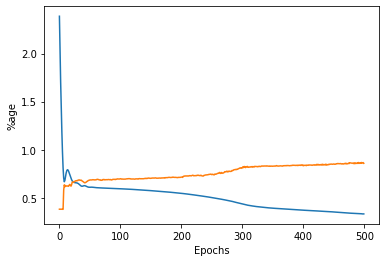

In [198]:
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.xlabel('Epochs')
plt.ylabel('%age')
plt.show()

In [199]:
test_eval = model.evaluate(test_x,test_y,batch_size=800, verbose=1)

1/1 [==============================] - 0s 254ms/step - loss: 0.5337 - accuracy: 0.8090


In [200]:
train_eval = model.evaluate(train_x,train_y,batch_size=800, verbose=1)

1/1 [==============================] - 0s 40ms/step - loss: 0.3320 - accuracy: 0.8676


In [201]:
y_pred = model.predict(test_x)

6/6 [==============================] - 0s 3ms/step


In [202]:
y_pred

array([[1.84423313e-01],
       [5.19668400e-01],
       [1.19571976e-01],
       [9.99975979e-01],
       [1.89597704e-04],
       [1.11370824e-01],
       [7.25222826e-01],
       [3.08071434e-01],
       [2.03140900e-01],
       [6.71209097e-01],
       [3.33244026e-01],
       [2.63414353e-01],
       [2.03140900e-01],
       [9.97391224e-01],
       [4.74657804e-01],
       [1.19571976e-01],
       [7.98516512e-01],
       [1.91735297e-01],
       [8.00840795e-01],
       [9.22074169e-02],
       [1.54404387e-01],
       [9.94647861e-01],
       [5.18478155e-01],
       [7.98341691e-01],
       [4.15562131e-02],
       [2.85880975e-02],
       [8.67038220e-02],
       [2.02921644e-01],
       [8.72690976e-02],
       [8.06450099e-02],
       [1.28259644e-01],
       [8.56008351e-01],
       [4.55558091e-01],
       [8.46655518e-02],
       [1.06557146e-01],
       [6.59415722e-02],
       [9.99896824e-01],
       [9.98556495e-01],
       [9.96894062e-01],
       [9.53261703e-02],


In [203]:
y_pred_hard = np.round(y_pred).astype(int)

In [204]:
print('Accuracy: ',accuracy_score(test_y,y_pred_hard))
print('Confusion Matrix:\n: ',confusion_matrix(test_y,y_pred_hard))
print('F1 score: ',f1_score(test_y,y_pred_hard))

Accuracy:  0.8089887640449438
Confusion Matrix:
:  [[95 15]
 [19 49]]
F1 score:  0.7424242424242423
